In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("liver.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
df.shape

(583, 11)

In [5]:
df=df.drop_duplicates()
df.shape # There were 13 duplicate rows in the data

(570, 11)

In [6]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
# There are 4 Nan values in the Albumin_and_Globulin_Ratio feature
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,1.287719
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
# Checking wheather the dataset is balanced or not
df['Dataset'].value_counts()

1    406
2    164
Name: Dataset, dtype: int64

In [9]:
# The dataset is imbalanced
# Mapping the instances of the label with 0 where there are 2s i.e patients without  liver disease
df['Dataset'] = df['Dataset'].map({2:0,1:1})
df['Dataset'].value_counts()

1    406
0    164
Name: Dataset, dtype: int64

In [10]:
df.columns=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Outcome']

In [11]:
# Only gender is the categorical features remaining all are the numerical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O' and feature !='Outcome']
numerical_features

['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio']

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

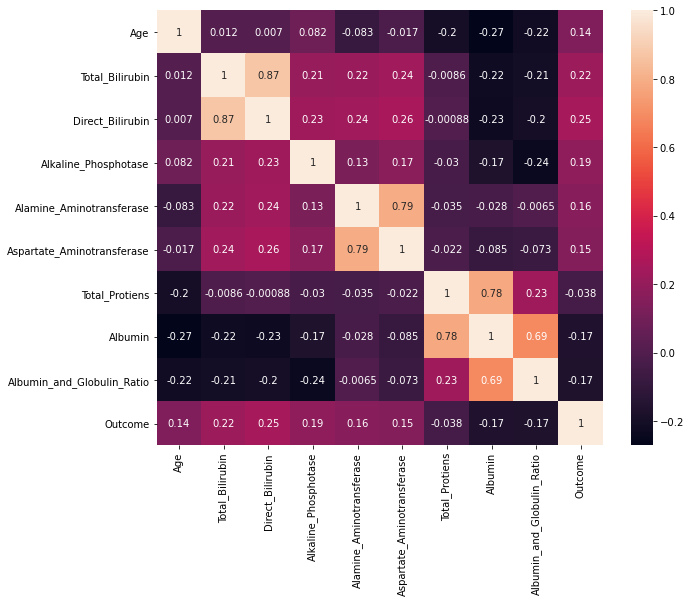

In [13]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [14]:
def HistPlot(df,numerical_features):
    for feature in numerical_features:
        sns.histplot(data=df,x=feature,kde=True)
        plt.title(feature)
        plt.show()

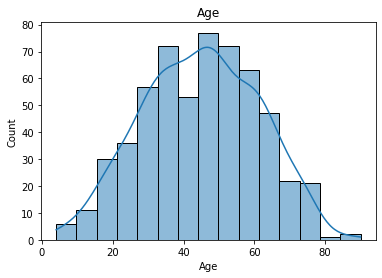

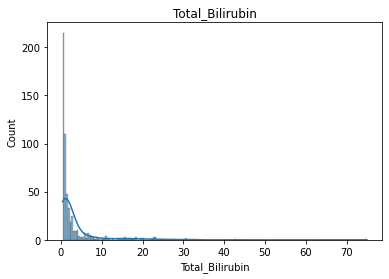

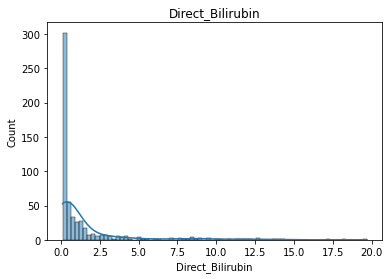

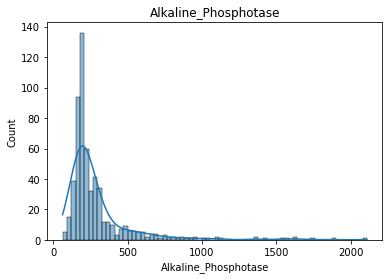

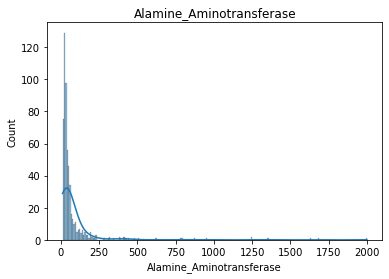

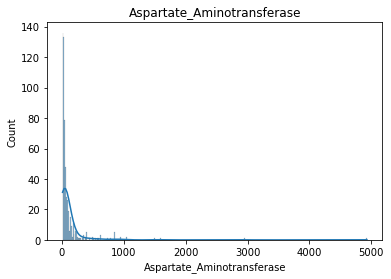

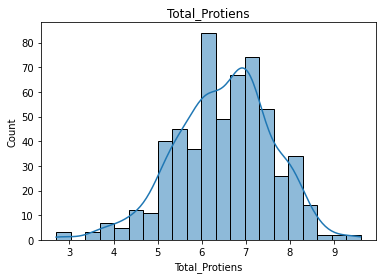

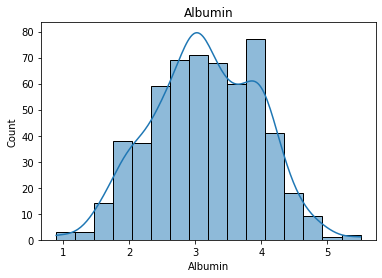

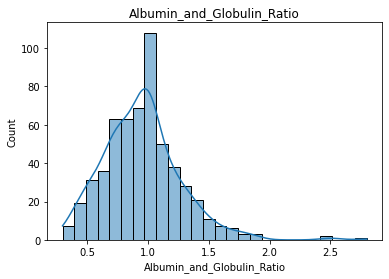

In [15]:
HistPlot(df,numerical_features)

In [16]:
def BoxPlot(df,numerical_features):    
    for feature in numerical_features:
        sns.boxplot(data=df,y=feature)
        plt.title(feature)
        plt.show()

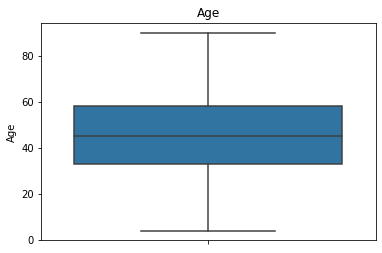

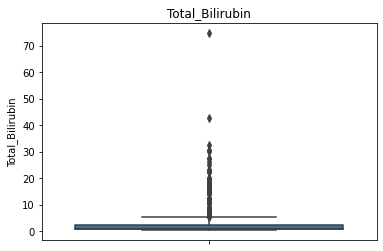

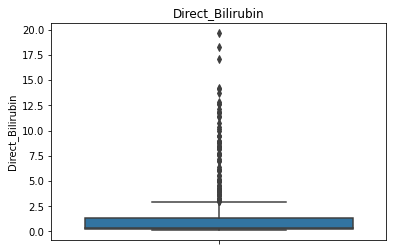

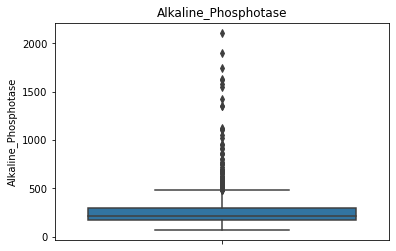

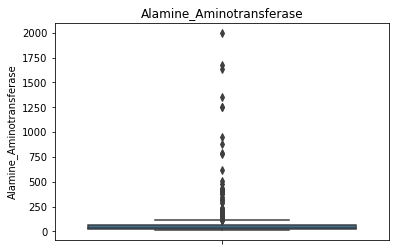

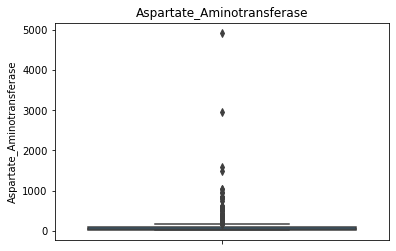

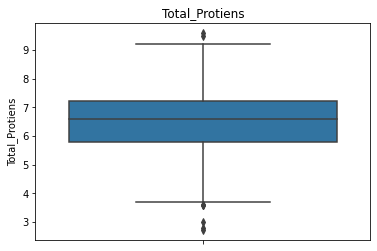

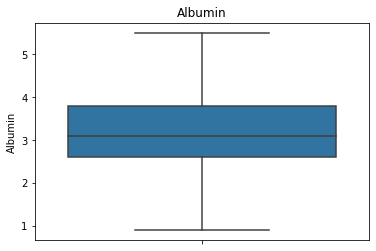

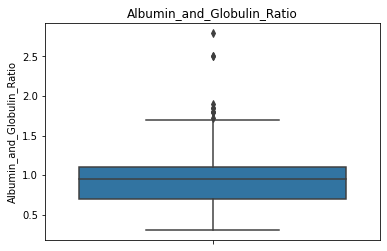

In [17]:
BoxPlot(df,numerical_features)

In [18]:
# Filling the Nan with the median value as Albumin_and_Globulin_Ration has outliers
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median())
df['Albumin_and_Globulin_Ratio'].isnull().sum()

0

In [19]:
# Finding the outliers in the continuous features
import numpy as np
def IQR(data,feature):
    outliers=[]
    q1,q3=np.percentile(data[feature],[25,75])
    upper=q3+1.5*(q3-q1)
    lower=q1-1.5*(q3-q1)
    for val in data[feature]:
        if val<lower or val>upper:
            outliers.append(val)
    return outliers

In [20]:
for feature in numerical_features:
    out=IQR(df,feature)
    print(f"{feature} has {len(out)} outliers")

Age has 0 outliers
Total_Bilirubin has 83 outliers
Direct_Bilirubin has 80 outliers
Alkaline_Phosphotase has 69 outliers
Alamine_Aminotransferase has 72 outliers
Aspartate_Aminotransferase has 66 outliers
Total_Protiens has 8 outliers
Albumin has 0 outliers
Albumin_and_Globulin_Ratio has 10 outliers


In [21]:
data=df.copy()

In [22]:
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [23]:
y.value_counts()

1    406
0    164
Name: Outcome, dtype: int64

In [24]:
# Fixing the imbalanced dataset with the help of upsamplying
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(sampling_strategy=0.8) # Increasing the intance with less number by 80% of the total occurance of the other instance  
X, Y = os.fit_resample(x,y)

In [25]:
Y.value_counts()

1    406
0    324
Name: Outcome, dtype: int64

In [26]:
Male=pd.get_dummies(X['Gender'],drop_first=True)

In [27]:
data2=pd.concat([Male,X.drop(['Gender'],axis=1),Y],axis=1)
data2.head()

,Male,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,1,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,1,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<AxesSubplot:>

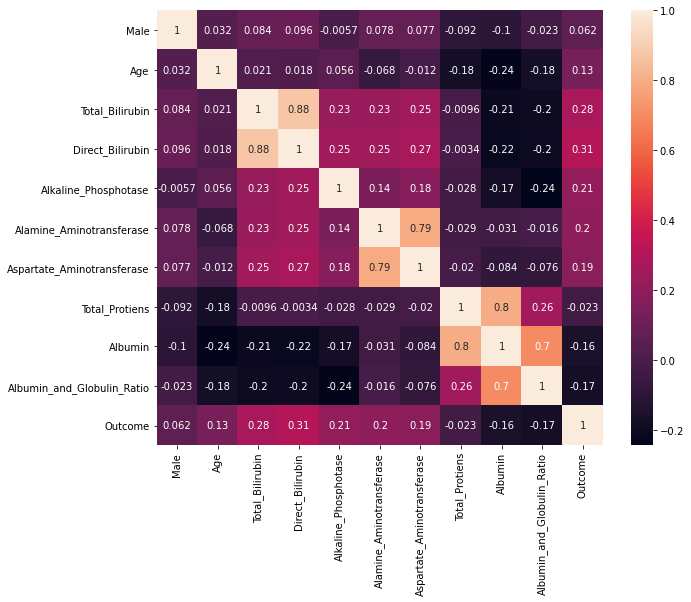

In [28]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data2.corr(),annot=True)

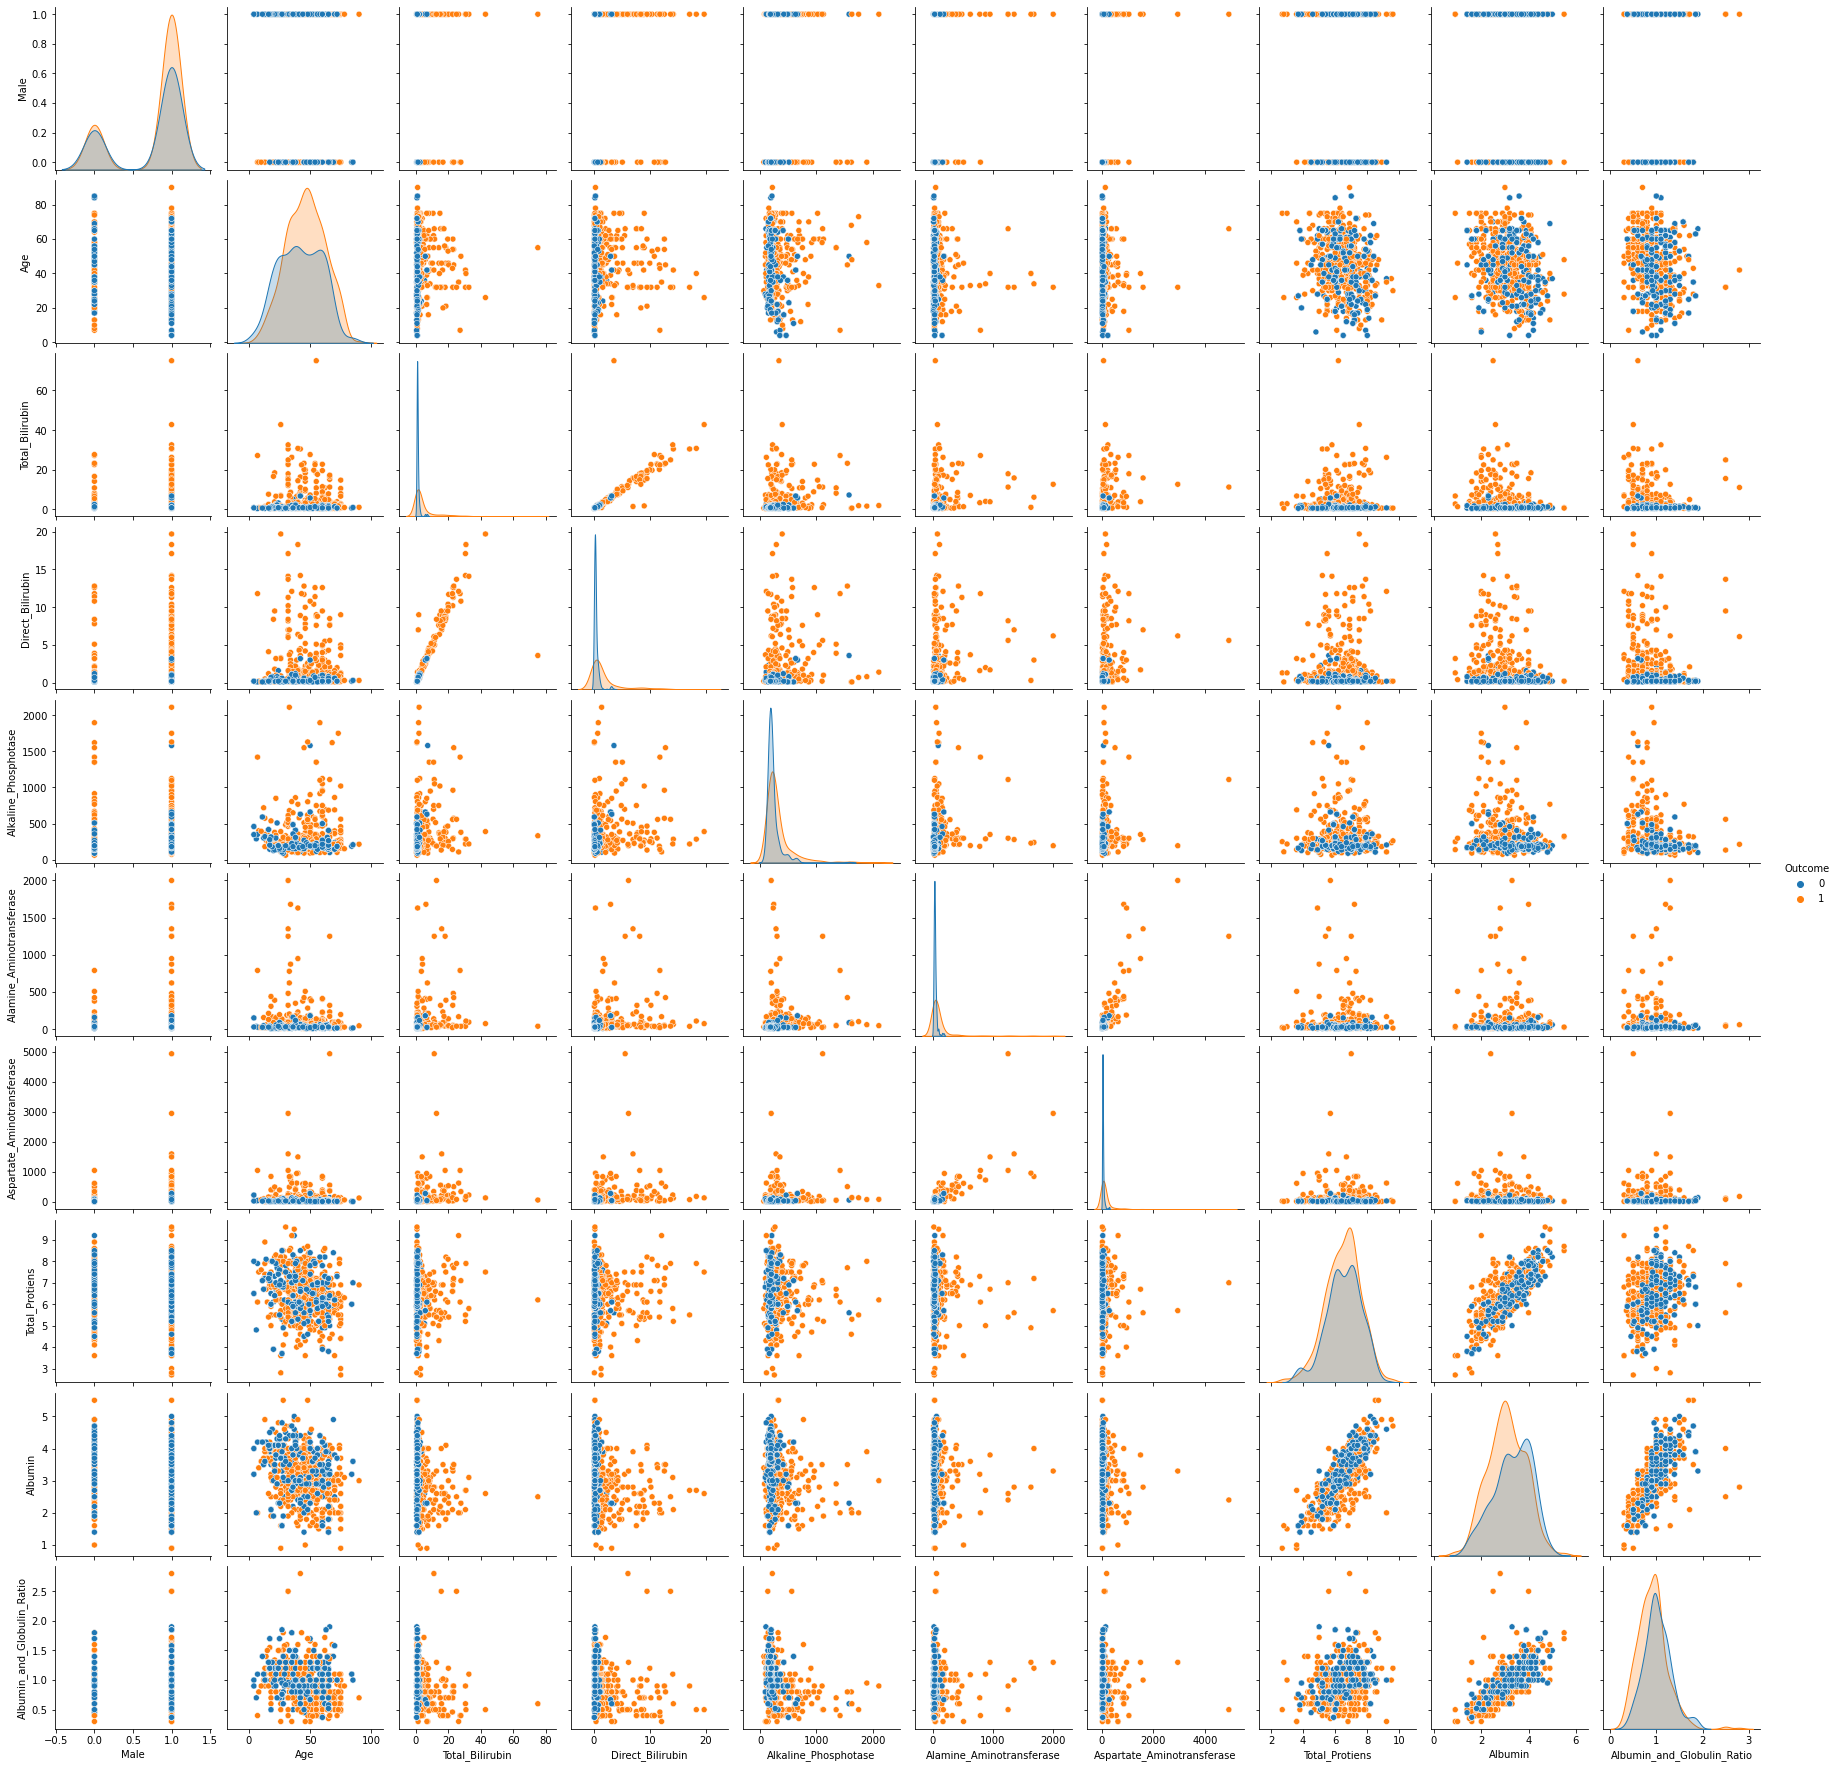

In [29]:
sns.pairplot(data2,hue='Outcome')

In [30]:
# If the total bilirubin and direct bilirubin are less then the person is not having liver problem
# Albumin and Total protein are having a positive relationship

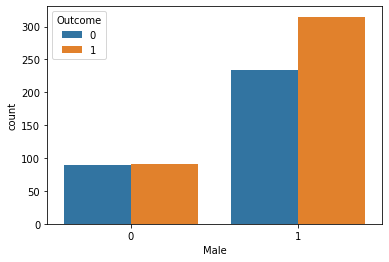

In [31]:
sns.countplot(x='Male',data=data2,hue='Outcome')
plt.show()# The number of males in the dataset is the highest  and also they are the most affected ones

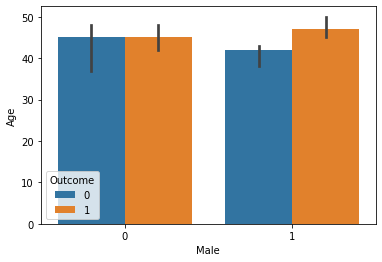

In [32]:
sns.barplot(x='Male',y='Age',data=data2,estimator=np.median,hue='Outcome')
plt.show() # Median age of a male having disease is near 46 and not having disease is near 38

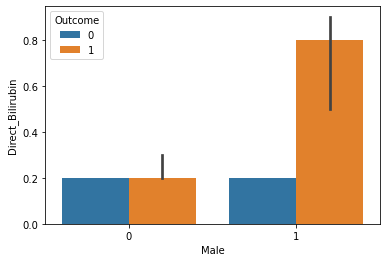

In [33]:
sns.barplot(x='Male',y='Direct_Bilirubin',data=data2,estimator=np.median,hue='Outcome')
plt.show() # Mean value of Direct_Bilirubin for a male having liver disease is 0.80

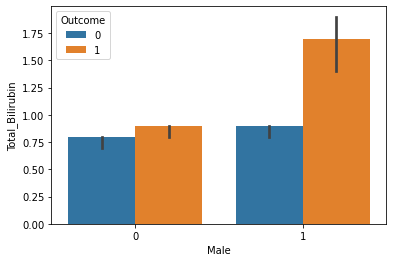

In [34]:
sns.barplot(x='Male',y='Total_Bilirubin',data=data2,estimator=np.median,hue='Outcome')
plt.show() # Mean value of Total_Bilirubin for a male having liver disease is 1.60

In [35]:
for feature in numerical_features:
    out=IQR(data2,feature)
    print(f"{feature} has {len(out)} outliers")

Age has 0 outliers
Total_Bilirubin has 102 outliers
Direct_Bilirubin has 100 outliers
Alkaline_Phosphotase has 83 outliers
Alamine_Aminotransferase has 83 outliers
Aspartate_Aminotransferase has 86 outliers
Total_Protiens has 13 outliers
Albumin has 0 outliers
Albumin_and_Globulin_Ratio has 21 outliers


In [36]:
data2.describe()

,Male,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.752055,44.287671,2.830822,1.252192,278.050685,69.675342,94.008219,6.492055,3.176301,0.961904,0.556164
std,0.432116,16.571564,5.631193,2.556173,224.279933,161.961290,259.243169,1.082289,0.802397,0.315035,0.497176
min,0.000000,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,1.000000,32.000000,0.725000,0.200000,174.000000,22.000000,24.000000,5.825000,2.600000,0.760000,0.000000
50%,1.000000,45.000000,0.900000,0.300000,202.000000,32.000000,36.000000,6.600000,3.200000,0.985000,1.000000
75%,1.000000,57.750000,2.000000,0.975000,290.000000,54.750000,71.000000,7.200000,3.800000,1.100000,1.000000
max,1.000000,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [37]:
data3=data2.copy()

In [38]:

# Total Bilirubin
# Adults:  0.3-1.2 mg/dL 
# Premature infants, cord blood:  < 2 mg/dL
# Premature infants, 0 to 1 day:  < 8 mg/dL 
# Premature infants, 1 to 2 days:  <12 mg/dL 
# Premature infants, 3 to 5 days:  <16 mg/dL 
# Neonates, cord blood:  <2 mg/dL
# Neonates, 1 to 2 days:  1.4-8.7 mg/dL 
# Neonates, 3 to 5 days:  1.5-12 mg/dL 
# Children, 6 days to 18 years:  0.3-1.2 mg/dL 
# Critical values:  Adult:  > 12 mg/dL
#                   Newborn:  >15 mg/dL (immediate treatment required to avoid kernicterus)


In [39]:
# Chekcing the value of the label wrt outliers of each feature
def Outlier_Record(data,feature,out_lst):
    lst=[]
    for i in range(len(data)):
        if data.loc[i,feature] in out_lst:
            lst.append(data.loc[i,:])
    df=pd.DataFrame(lst,columns=data.columns)
    return df

In [40]:
tb=Outlier_Record(data2,'Total_Bilirubin',list(set(IQR(data2,'Total_Bilirubin'))))
len(tb[tb['Outcome']==1])

94

In [41]:
# Replacing the extreme outliers with the 90 percentile value
data3[data3['Total_Bilirubin']>40]

,Male,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
155,1,55,75.0,3.6,332,40,66,6.2,2.5,0.6,1
546,1,26,42.8,19.7,390,75,138,7.5,2.6,0.5,1


<AxesSubplot:xlabel='Total_Bilirubin', ylabel='Count'>

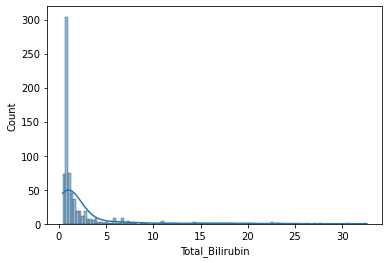

In [44]:
for i in range(len(data3['Total_Bilirubin'])):
    if data3.loc[i,'Total_Bilirubin']>40:
        data3.loc[i,'Total_Bilirubin']=np.percentile(data2['Total_Bilirubin'],95)

sns.histplot(x='Total_Bilirubin',data=data3[['Total_Bilirubin']],kde=True)

In [45]:
# Direct Bilirubin
data3[data3['Direct_Bilirubin']>15]

,Male,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
491,1,32,30.500,17.1,218,39,79,5.5,2.7,0.9,1
518,1,40,30.800,18.3,285,110,186,7.9,2.7,0.5,1
546,1,26,14.365,19.7,390,75,138,7.5,2.6,0.5,1


<AxesSubplot:xlabel='Direct_Bilirubin', ylabel='Count'>

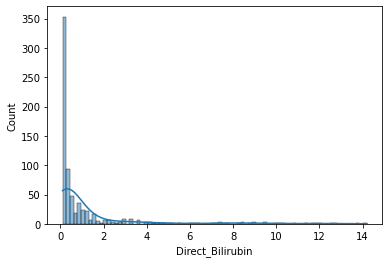

In [49]:
for i in range(len(data3['Direct_Bilirubin'])):
    if data3.loc[i,'Direct_Bilirubin']>15:
        data3.loc[i,'Direct_Bilirubin']=np.percentile(data2['Direct_Bilirubin'],95)

sns.histplot(x='Direct_Bilirubin',data=data3[['Direct_Bilirubin']],kde=True)

In [50]:
#  Alkaline Phosphatase Blood Test Ranges
# Normal	44 to 147 IU/L or 0.73 to 2.45 microkat/L
# Higher than normal	>147 IU/L or >2.45 microkat/L
# Lower than normal 	<44 IU/L or <0.73 microkat/L

In [51]:
# Alkaline_Phosphate
data3[data3['Alkaline_Phosphotase']>1200]

,Male,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
72,0,68,0.6,0.1,1620,95,127,4.6,2.1,0.80,1
108,1,50,7.3,3.6,1580,88,64,5.6,2.3,0.60,0
109,1,48,0.7,0.1,1630,74,149,5.3,2.0,0.60,1
121,0,58,1.7,0.8,1896,61,83,8.0,3.9,0.95,1
187,0,7,27.2,11.8,1420,790,1050,6.1,2.0,0.40,1
220,1,33,2.0,1.4,2110,48,89,6.2,3.0,0.90,1
406,0,55,8.2,3.9,1350,52,65,6.7,2.9,0.70,1
407,0,55,10.9,5.1,1350,48,57,6.4,2.3,0.50,1
416,1,73,1.9,0.7,1750,102,141,5.5,2.0,0.50,1
434,0,45,23.3,12.8,1550,425,511,7.7,3.5,0.80,1


<AxesSubplot:xlabel='Alkaline_Phosphotase', ylabel='Count'>

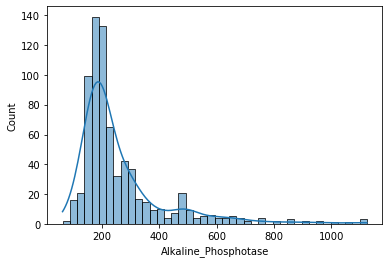

In [54]:
for i in range(len(data3['Alkaline_Phosphotase'])):
    if data3.loc[i,'Alkaline_Phosphotase']>1200:
        data3.loc[i,'Alkaline_Phosphotase']=np.percentile(data2['Alkaline_Phosphotase'],90)

sns.histplot(x='Alkaline_Phosphotase',data=data3[['Alkaline_Phosphotase']],kde=True)

In [55]:
# Normal range of Alamine_Aminotransferase is between 5 to 35 IU/L
# Alamine_Aminotransferase
data3[data3['Alamine_Aminotransferase']>1000]

,Male,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
25,1,34,6.2,3.0,240.0,1680,850,7.2,4.0,1.2,1
44,1,40,1.1,0.3,230.0,1630,960,4.9,2.8,1.3,1
110,1,32,12.7,6.2,194.0,2000,2946,5.7,3.3,1.3,1
111,1,32,15.9,7.0,280.0,1350,1600,5.6,2.8,1.0,1
112,1,32,18.0,8.2,298.0,1250,1050,5.4,2.6,0.9,1
128,1,66,11.3,5.6,1110.0,1250,4929,7.0,2.4,0.5,1


<AxesSubplot:xlabel='Alamine_Aminotransferase', ylabel='Count'>

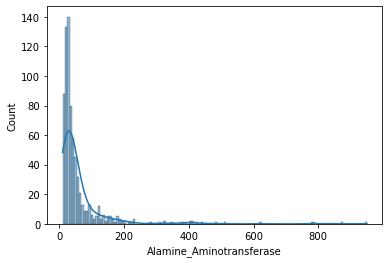

In [57]:
for i in range(len(data3['Alamine_Aminotransferase'])):
    if data3.loc[i,'Alamine_Aminotransferase']>1000:
        data3.loc[i,'Alamine_Aminotransferase']=np.percentile(data3['Alamine_Aminotransferase'],90)

sns.histplot(x='Alamine_Aminotransferase',data=data3[['Alamine_Aminotransferase']],kde=True)

In [58]:
#Aspartate_Aminotransferase
data3[data3['Aspartate_Aminotransferase']>1200]

,Male,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
110,1,32,12.7,6.2,194.0,119.0,2946,5.7,3.3,1.3,1
111,1,32,15.9,7.0,280.0,119.0,1600,5.6,2.8,1.0,1
128,1,66,11.3,5.6,1110.0,119.0,4929,7.0,2.4,0.5,1
194,1,40,3.9,1.7,350.0,950.0,1500,6.7,3.8,1.3,1


<AxesSubplot:xlabel='Alamine_Aminotransferase', ylabel='Count'>

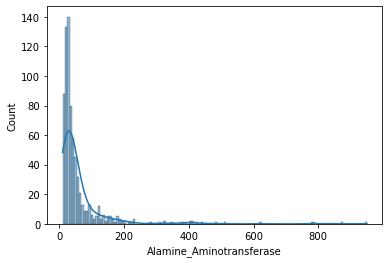

In [61]:
for i in range(len(data3['Alamine_Aminotransferase'])):
    if data3.loc[i,'Alamine_Aminotransferase']>1200:
        data3.loc[i,'Alamine_Aminotransferase']=np.percentile(data2['Aspartate_Aminotransferase'],95)

sns.histplot(x='Alamine_Aminotransferase',data=data3[['Alamine_Aminotransferase']],kde=True)

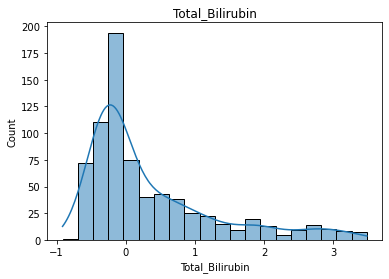

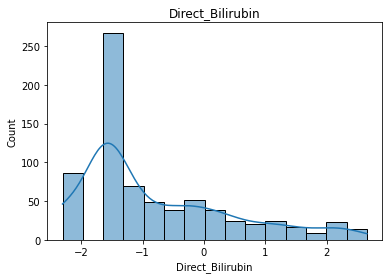

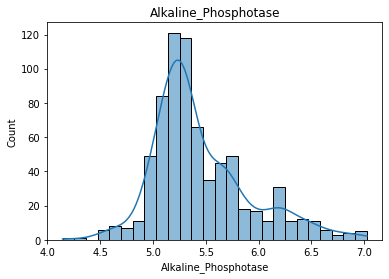

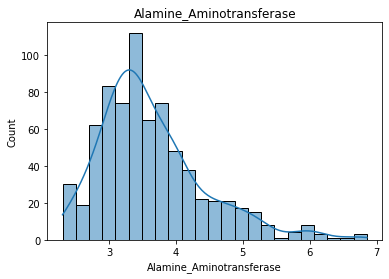

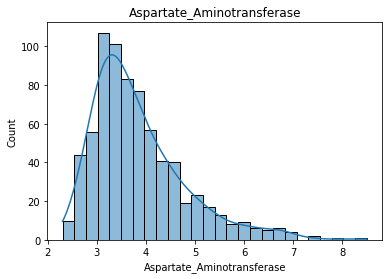

In [62]:
# Log transformation
for feature in numerical_features:
    if feature not in ['Age','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']:
        sns.histplot(data=np.log(data3[[feature]]),x=feature,kde=True)
        plt.title(feature)
        plt.show()

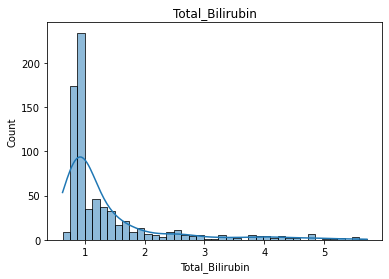

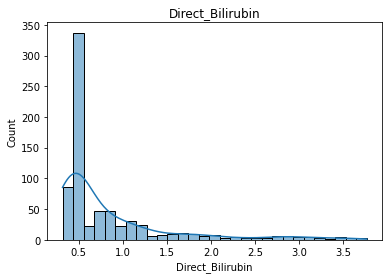

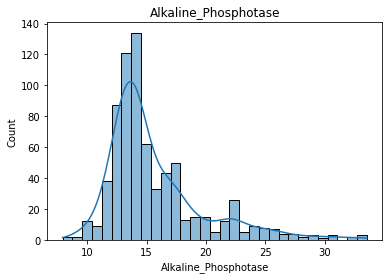

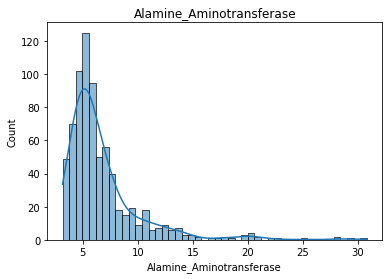

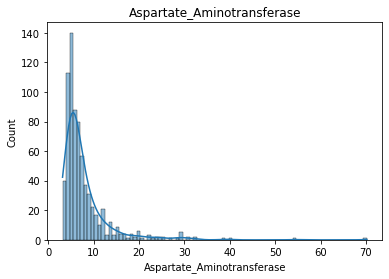

In [63]:
# Sqrt transformation
for feature in numerical_features:
    if feature not in ['Age','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']:
        sns.histplot(data=np.sqrt(data3[[feature]]),x=feature,kde=True)
        plt.title(feature)
        plt.show()

In [64]:
# Log transforming Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase
data4=data3.drop(['Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase'],axis=1)
trans=np.log(data3[['Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase']])
data5=pd.concat([data4,trans],axis=1)
data5.head()

,Male,Age,Total_Bilirubin,Direct_Bilirubin,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase
0,0,65,0.7,0.1,6.8,3.3,0.90,1,5.231109,2.772589,2.890372
1,1,62,10.9,5.5,7.5,3.2,0.74,1,6.549651,4.158883,4.605170
2,1,62,7.3,4.1,7.0,3.3,0.89,1,6.194405,4.094345,4.219508
3,1,58,1.0,0.4,6.8,3.4,1.00,1,5.204007,2.639057,2.995732
4,1,72,3.9,2.0,7.3,2.4,0.40,1,5.273000,3.295837,4.077537


In [65]:
x=data5.drop(['Outcome'],axis=1)
y=data5['Outcome']

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((584, 10), (146, 10), (584,), (146,))

<AxesSubplot:>

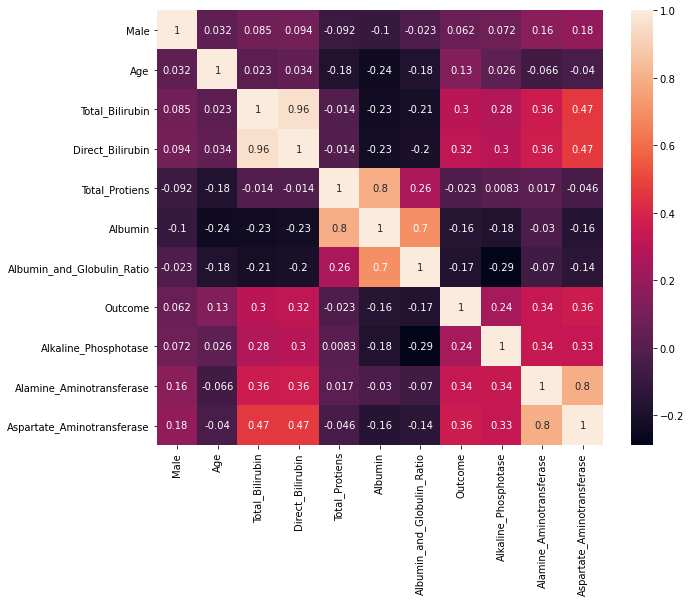

In [67]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data5.corr(),annot=True)

In [68]:
# Dropping Total_Protein as it is having a correlation of near 0 with the outcome
X_train=X_train.drop(['Total_Protiens','Male'],axis=1)
X_test=X_test.drop(['Total_Protiens','Male'],axis=1)
X_train.shape,X_test.shape

((584, 8), (146, 8))

In [69]:
from sklearn.preprocessing import MinMaxScaler
mms3=MinMaxScaler()
X_train_scale=mms3.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scale,columns=X_train.columns)
X_test_scale=mms3.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scale,columns=X_train.columns)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xg

In [71]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
ada=AdaBoostClassifier()
svc=SVC()
knn=KNeighborsClassifier()
xgb=xg.XGBClassifier()
scores=[[],[],[],[],[],[],[],[]]
classifiers=[lr,dt,rf,gb,ada,svc,knn,xgb]
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_train_scaled):
    X_train_fold, X_test_fold = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    for index,model in enumerate (classifiers):
        model.fit(X_train_fold,y_train_fold)
        p=model.predict(X_test_fold)
        acc=accuracy_score(y_test_fold,p)
        scores[index].append(acc)

C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:07:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:07:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:07:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [72]:
for index,each in enumerate(scores):
    print(f"KFold accuracies of {classifiers[index]} : {each}")

KFold accuracies of LogisticRegression() : [0.6666666666666666, 0.7094017094017094, 0.7264957264957265, 0.6837606837606838, 0.6724137931034483]
KFold accuracies of DecisionTreeClassifier() : [0.7777777777777778, 0.6410256410256411, 0.7264957264957265, 0.7948717948717948, 0.7931034482758621]
KFold accuracies of RandomForestClassifier() : [0.7435897435897436, 0.7521367521367521, 0.7948717948717948, 0.8888888888888888, 0.7931034482758621]
KFold accuracies of GradientBoostingClassifier() : [0.7435897435897436, 0.7350427350427351, 0.7948717948717948, 0.8376068376068376, 0.7931034482758621]
KFold accuracies of AdaBoostClassifier() : [0.6923076923076923, 0.6837606837606838, 0.717948717948718, 0.7948717948717948, 0.7327586206896551]
KFold accuracies of SVC() : [0.6666666666666666, 0.6581196581196581, 0.7435897435897436, 0.7692307692307693, 0.6810344827586207]
KFold accuracies of KNeighborsClassifier() : [0.6666666666666666, 0.6923076923076923, 0.6495726495726496, 0.7350427350427351, 0.68965517

In [73]:
# Getting mean of each models
for index,each in enumerate(scores):
    print(f"Mean of KFold accuracies of {classifiers[index]} : {np.mean(each)*100}")

Mean of KFold accuracies of LogisticRegression() : 69.17477158856468
Mean of KFold accuracies of DecisionTreeClassifier() : 74.66548776893605
Mean of KFold accuracies of RandomForestClassifier() : 79.45181255526083
Mean of KFold accuracies of GradientBoostingClassifier() : 78.08429118773947
Mean of KFold accuracies of AdaBoostClassifier() : 72.43295019157088
Mean of KFold accuracies of SVC() : 70.37282640730915
Mean of KFold accuracies of KNeighborsClassifier() : 68.66489832007073
Mean of KFold accuracies of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_w

In [77]:
from sklearn.metrics import roc_curve,roc_auc_score
def Threshold_Accuracy(model,X_test_scaled,y_test):
    pred_proba=model.predict_proba(X_test_scaled)[:,1]
#     auc_xg = roc_auc_score(y_test, pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
    accuracy_ls,fp,fn,tp,tn = [],[],[],[],[]
    for thres in thresholds:
        y_pred = np.where(pred_proba>thres,1,0)
        accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
        fp.append(confusion_matrix(y_test,y_pred)[1,0])
        fn.append(confusion_matrix(y_test,y_pred)[0,1])
        tn.append(confusion_matrix(y_test,y_pred)[1,1])
        tp.append(confusion_matrix(y_test,y_pred)[0,0])
    accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(tp), pd.Series(fn),pd.Series(fp),pd.Series(tn),pd.Series(accuracy_ls)],
                            axis=1)
    return accuracy_ls

In [82]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
rf=RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
pred=rf.predict(X_test_scaled)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7945205479452054
[[58  8]
 [22 58]]
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        66
           1       0.88      0.72      0.79        80

    accuracy                           0.79       146
   macro avg       0.80      0.80      0.79       146
weighted avg       0.81      0.79      0.79       146



In [83]:
accuracy_ls=Threshold_Accuracy(rf,X_test_scaled,y_test)
accuracy_ls.columns = ['thresholds','True Positive','False Negative','False Positive','True Negative','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(7)

,thresholds,True Positive,False Negative,False Positive,True Negative,accuracy
42,0.25,41,25,2,78,0.815068
38,0.32,47,19,8,72,0.815068
39,0.30,46,20,8,72,0.808219
37,0.35,48,18,10,70,0.808219
43,0.24,40,26,2,78,0.808219
36,0.36,48,18,11,69,0.801370
32,0.43,53,13,16,64,0.801370


In [84]:
# Gradient Boost
gb=GradientBoostingClassifier()
gb.fit(X_train_scaled,y_train)
pred_gb=gb.predict(X_test_scaled)
print(confusion_matrix(y_test,pred_gb))
print(classification_report(y_test,pred_gb))
print(accuracy_score(y_test,pred_gb))

[[51 15]
 [25 55]]
              precision    recall  f1-score   support

           0       0.67      0.77      0.72        66
           1       0.79      0.69      0.73        80

    accuracy                           0.73       146
   macro avg       0.73      0.73      0.73       146
weighted avg       0.73      0.73      0.73       146

0.726027397260274


In [85]:
accuracy_ls=Threshold_Accuracy(gb,X_test_scaled,y_test)
accuracy_ls.columns = ['thresholds','True Positive','False Negative','False Positive','True Negative','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(7)

,thresholds,True Positive,False Negative,False Positive,True Negative,accuracy
33,0.409359,44,22,16,64,0.739726
31,0.410147,45,21,17,63,0.739726
30,0.410645,45,21,18,62,0.732877
32,0.409888,44,22,17,63,0.732877
29,0.420295,46,20,19,61,0.732877
15,0.595045,58,8,32,48,0.726027
35,0.394467,40,26,14,66,0.726027


In [86]:
# Xg Boost
xgb=xg.XGBClassifier()
xgb.fit(X_train_scaled,y_train)
pred_xgb=xgb.predict(X_test_scaled)
print(confusion_matrix(y_test,pred_xgb))
print(classification_report(y_test,pred_xgb))
print(accuracy_score(y_test,pred_xgb))

[01:15:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[53 13]
 [21 59]]
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        66
           1       0.82      0.74      0.78        80

    accuracy                           0.77       146
   macro avg       0.77      0.77      0.77       146
weighted avg       0.77      0.77      0.77       146

0.7671232876712328


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [87]:
accuracy_ls=Threshold_Accuracy(xgb,X_test_scaled,y_test)
accuracy_ls.columns = ['thresholds','True Positive','False Negative','False Positive','True Negative','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(7)

,thresholds,True Positive,False Negative,False Positive,True Negative,accuracy
28,0.279555,51,15,12,68,0.815068
36,0.083464,45,21,6,74,0.815068
32,0.110452,48,18,9,71,0.815068
30,0.122145,49,17,10,70,0.815068
29,0.207065,50,16,11,69,0.815068
27,0.289141,51,15,13,67,0.808219
37,0.082112,44,22,6,74,0.808219


In [98]:
# Selecting the Random Forest with threshold of 0.32 as our final model based on FN and FP
threshold = 0.32
predicted_proba = rf.predict_proba(X_test_scaled)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
print(accuracy_score(y_test,predicted))
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

0.8082191780821918
[[46 20]
 [ 8 72]]
              precision    recall  f1-score   support

           0       0.85      0.70      0.77        66
           1       0.78      0.90      0.84        80

    accuracy                           0.81       146
   macro avg       0.82      0.80      0.80       146
weighted avg       0.81      0.81      0.81       146



In [100]:
import pickle
pickle.dump(mms3,open("liver_scaler.pkl",'wb'))
pickle.dump(rf, open("liver_model.pkl", 'wb'))

In [101]:
X_test.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Albumin,Albumin_and_Globulin_Ratio,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase
468,45,2.3,1.3,4.0,1.2,5.641907,4.882802,5.908083
148,72,0.7,0.1,2.0,0.5,5.278115,2.995732,3.555348
302,22,0.9,0.3,3.7,1.2,5.187386,2.890372,3.044522
355,42,0.8,0.2,3.9,1.1,5.204007,3.091042,2.995732
515,45,1.7,0.8,2.1,0.5,5.752573,2.484907,3.637586
